In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../data-sets/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().sum()
df.drop(labels=['chol', 'fbs', 'trestbps', 'restecg'], axis=1, inplace=True)

In [5]:
X = df.drop('target', axis=1)
y = df['target']
print(X.shape, y.shape)

(303, 9) (303,)


In [ ]:
df.corr()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
thalach,-0.398522,-0.044020,0.295762,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696
slope,-0.168814,-0.030711,0.119717,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,0.345877
ca,0.276326,0.118261,-0.181053,-0.213177,0.115739,0.222682,-0.080155,1.000000,0.151832,-0.391724
thal,0.068001,0.210041,-0.161736,-0.096439,0.206754,0.210244,-0.104764,0.151832,1.000000,-0.344029
target,-0.225439,-0.280937,0.433798,0.421741,-0.436757,-0.430696,0.345877,-0.391724,-0.344029,1.000000


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(242, 9) (61, 9) (242,) (61,)


In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

In [9]:
from sklearn.metrics import accuracy_score
pred = model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)


0.8688524590163934


In [10]:
from sklearn.metrics import confusion_matrix
matrx = confusion_matrix(y_test, pred)
tn, fp, fn, tp = matrx.ravel()
print(matrx)
print(tn, fp, fn, tp)

[[25  4]
 [ 4 28]]
25 4 4 28


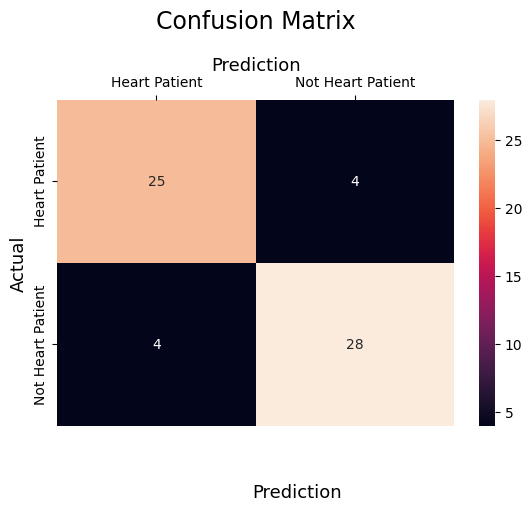

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(matrx, annot=True, fmt='g', xticklabels=['Heart Patient', 'Not Heart Patient'], yticklabels=['Heart Patient', 'Not Heart Patient'])
plt.ylabel('Actual', fontsize=13)
plt.xlabel('Prediction', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()